<a href="https://colab.research.google.com/github/lucasllimati/Bootcamp-Data-Science-Aplicada/blob/main/Projeto_do_Modulo_01_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando os dados

Analisando dados da saúde (DATASUS) com Python e Pandas
Dataset: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

Explicação: http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf

Filtros aplicados:
* Linha: Unidade da Federação
* Coluna: Ano/Mês processamento
* Conteúdo: 
* Períodos disponíveis: Jan/2008 até Mar/2021

Arquivos formato CSV
1.   Número de internação: A124248189_28_143_208
2.   Dias de permanência: A124422189_28_143_208
3.   Óbito: A125005189_28_143_208
4. 



## Hípoteses e perguntas

- Número de internações em estações mais frios
- Aumento em épocas epidemicas

## Importação das bibliotecas

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1 - Número de internações

In [2]:
internacao = pd.read_csv("/content/A124248189_28_143_208.csv", encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands = ".", decimal = ",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
# internacao = internacao.set_index('Unidade da Federação')
# internacao = internacao[internacao.columns[1:]]
# internacao.head()

In [4]:
# Exibir os 5 primeiros dados do dataframe
internacao.head()

,Unidade da Federação,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,1,-,-,-,-,-,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,...,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
1,12 Acre,1,-,-,-,-,1,-,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,...,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069
2,13 Amazonas,3,2,-,1,-,-,1,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,...,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754
3,14 Roraima,-,-,-,-,-,1,-,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,...,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989
4,15 Pará,8,6,-,-,1,1,4,404,798,3202,8690,24743,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,...,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718,6479075


In [5]:
# Exibir os 5 últimos dados do dataframe
internacao.tail()

,Unidade da Federação,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,-,-,-,-,-,4,19,251,1261,4907,10116,27817,58910,54736,61611,59890,59106,60888,64579,61252,61948,62243,58598,55442,59078,52109,63522,59407,61791,61262,66785,62365,60969,63003,60792,58292,59683,54080,64897,...,62521,54218,63875,64284,63550,62887,67131,66614,59802,65061,60075,56113,62443,56389,61635,64444,68285,65770,69225,67859,64316,66553,61739,59523,64798,58095,56860,44722,50489,52459,53034,53711,55363,58700,59128,55855,55226,44292,22380,9708322
23,50 Mato Grosso do Sul,-,-,-,-,-,-,12,162,421,954,2198,6232,12254,12062,13397,13124,12990,13383,13603,12686,13317,13340,12329,11137,11884,11519,14521,13453,13163,12981,13726,14409,13626,13226,13429,12494,13342,13084,16236,...,13703,12293,14594,14534,14615,13933,14648,14605,13923,14429,14006,13123,14012,13582,14841,15468,16162,14816,14758,14849,14724,14844,14442,14020,15223,14699,14463,10843,11586,11609,12231,12267,12731,13154,12819,12036,10146,7671,3149,2137794
24,51 Mato Grosso,3,2,-,-,-,1,6,102,320,977,2085,7975,13961,13522,16016,15480,15568,15085,15150,14483,14952,14449,13244,12567,13878,12784,16552,15968,15873,14763,14775,15580,14671,14052,14747,13942,15115,13939,16803,...,15425,14307,17145,16825,17021,16036,16427,16308,15615,16561,15139,14447,15742,15054,16601,16936,17606,16340,16851,16797,16697,17200,15691,14500,15955,14939,15093,11701,12809,12909,13666,13922,14257,14568,13946,13228,12207,10189,6787,2421359
25,52 Goiás,3,3,-,-,-,3,7,298,812,1988,4158,15850,31520,28761,33751,34080,29786,28488,28751,30948,32218,29253,25739,24626,28061,26735,33745,31661,31135,28794,29833,31998,31121,29644,30215,28874,32623,30627,35019,...,27719,25480,29211,28481,28692,26401,26744,27909,27232,27709,26380,25947,27589,26353,28366,30316,30868,28249,28659,29103,28726,29589,27592,26978,28624,27150,26486,21089,22844,24001,25576,25837,26288,26792,24894,23756,22425,18442,12400,4532259
26,53 Distrito Federal,4,12,1,-,1,1,9,47,281,1918,4752,9370,14525,14212,16576,16585,15974,15376,15099,15648,16040,15609,15052,14155,14664,14030,17386,16146,16175,15313,15674,15833,15794,14766,14992,14371,15434,14567,17306,...,16630,15458,18084,17561,18035,16899,17108,17576,17661,17534,17409,17158,18334,18045,19814,20498,20370,18496,19792,20342,19898,20198,17807,17381,18316,17617,18055,15850,16647,16563,16931,17705,17613,18395,17250,17473,17498,14852,11179,2559110


In [6]:
# Informações do dataframe
internacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 173 entries, Unidade da Federação to Total
dtypes: int64(165), object(8)
memory usage: 36.6+ KB


In [7]:
# Formatando valor para decimais
pd.options.display.float_format = "{:.2f}".format

# Média mensal
internacao.mean()

2007/Ago       234.41
2007/Set       591.07
2007/Out      1999.26
2007/Nov      4933.48
2007/Dez     14552.56
              ...    
2020/Dez     31787.93
2021/Jan     30256.93
2021/Fev     24730.33
2021/Mar     16528.41
Total      5532216.52
Length: 165, dtype: float64

In [8]:
# Filtrando mês específico
internacao["2020/Out"]

0       8791
1       3973
2      15796
3       3404
4      38418
5       3112
6       2251
7      34964
8      16473
9      39338
10     14365
11     12319
12     43230
13     13775
14      7607
15     63717
16     96086
17     18778
18     56069
19    194383
20     64455
21     38946
22     58700
23     13154
24     14568
25     26792
26     18395
Name: 2020/Out, dtype: int64

In [9]:
# Média do mês Janeiro 2008
internacao["2020/Out"].mean()

34142.92592592593

In [10]:
internacao.index

RangeIndex(start=0, stop=27, step=1)

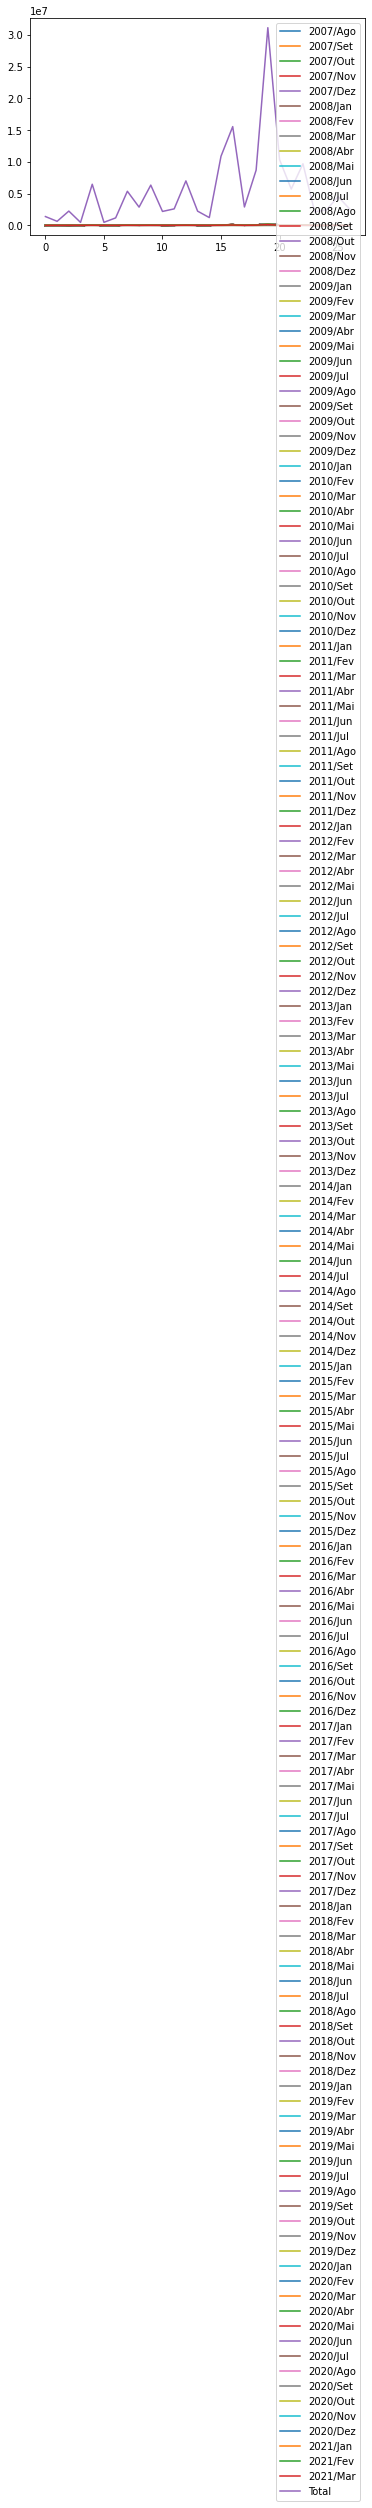

In [11]:
internacao.plot()

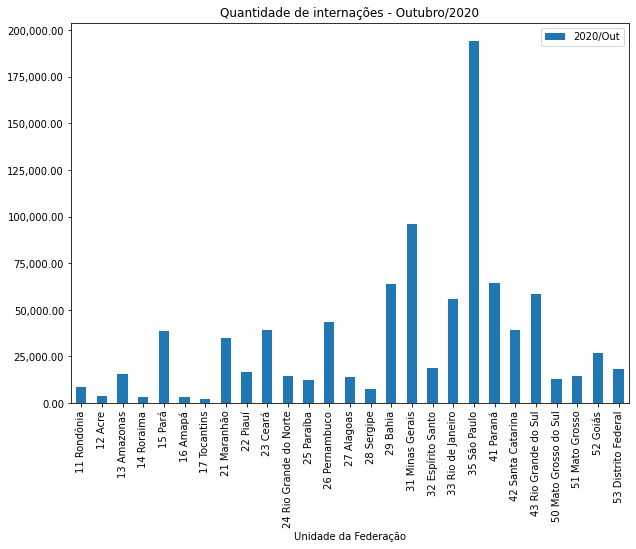

In [12]:
ax = internacao.plot(x = "Unidade da Federação", y = "2020/Out", kind = "bar", figsize=(10 , 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Quantidade de internações - Outubro/2020")
plt.show()

In [13]:
colunas_internacao = internacao.mean().index
colunas_internacao

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [14]:
internacao = internacao.set_index("Unidade da Federação")
internacao

,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,1,-,-,-,-,-,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,...,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
12 Acre,1,-,-,-,-,1,-,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,...,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069
13 Amazonas,3,2,-,1,-,-,1,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,...,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754
14 Roraima,-,-,-,-,-,1,-,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,...,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989
15 Pará,8,6,-,-,1,1,4,404,798,3202,8690,24743,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,...,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718,6479075
16 Amapá,-,-,-,-,1,3,25,75,272,258,524,1602,2721,2511,2390,2663,2740,2699,2674,2931,2852,3017,2897,3018,3110,2687,3299,3236,3407,3119,3086,3357,3228,3029,2885,2890,3070,2715,3169,3134,...,2744,2540,2797,3101,3139,3041,3132,3508,3510,3576,3303,3301,3454,3386,3533,3542,3272,3329,3356,3147,3494,3476,3298,3013,3313,3143,2956,2295,2526,2617,2746,2993,2822,3112,2890,2968,2950,1839,1161,478668
17 Tocantins,-,1,-,-,-,1,1,8,48,206,1195,4961,8294,7846,8562,8793,8751,8466,7590,8346,8254,8491,7653,7512,8202,7828,9172,8587,8559,8358,7957,8383,8201,8415,8571,8045,8411,8013,9439,9026,...,5881,5176,6003,6235,6520,5582,5184,5636,5548,6041,6123,6173,5947,5842,6645,7160,7178,6876,6587,7165,7159,7229,7420,7480,7130,7149,6668,5899,5754,5999,6039,4805,3848,2251,475,407,433,480,650,1177323
21 Maranhão,4,6,-,1,3,-,17,461,1103,2803,6274,13992,26181,25847,28377,29188,27669,27734,27433,27837,28582,27068,25929,23784,28154,26533,32689,30362,30650,29598,29856,30720,31897,32414,30618,28626,32634,29964,34454,33058,...,40245,34823,39330,41060,41571,38360,39493,40807,39192,40657,37595,35546,3842

In [15]:
lista = internacao.index
lista

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [16]:
# regiao = []

# for i in lista:    
#     if i[0] == '1':        
#         regiao.append('Norte')
        
#     if i[0] == '2':        
#         regiao.append('Nordeste')
    
#     if i[0] == '3':        
#         regiao.append('Sudeste')
        
#     if i[0] == '4':        
#         regiao.append('Sul')
        
#     if i[0] == '5':        
#         regiao.append('Centro-Oeste')

# lista['regiao'] = regiao

In [17]:
colunas_internacao = internacao.mean().index.tolist()
colunas_internacao.insert(0, "Unidade da Federação")
colunas_internacao

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [18]:
# internacao = internacao[colunas_internacao]
# internacao.head()

In [19]:
internacao

,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,1,-,-,-,-,-,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,...,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
12 Acre,1,-,-,-,-,1,-,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,...,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069
13 Amazonas,3,2,-,1,-,-,1,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,...,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754
14 Roraima,-,-,-,-,-,1,-,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,...,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989
15 Pará,8,6,-,-,1,1,4,404,798,3202,8690,24743,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,...,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718,6479075
16 Amapá,-,-,-,-,1,3,25,75,272,258,524,1602,2721,2511,2390,2663,2740,2699,2674,2931,2852,3017,2897,3018,3110,2687,3299,3236,3407,3119,3086,3357,3228,3029,2885,2890,3070,2715,3169,3134,...,2744,2540,2797,3101,3139,3041,3132,3508,3510,3576,3303,3301,3454,3386,3533,3542,3272,3329,3356,3147,3494,3476,3298,3013,3313,3143,2956,2295,2526,2617,2746,2993,2822,3112,2890,2968,2950,1839,1161,478668
17 Tocantins,-,1,-,-,-,1,1,8,48,206,1195,4961,8294,7846,8562,8793,8751,8466,7590,8346,8254,8491,7653,7512,8202,7828,9172,8587,8559,8358,7957,8383,8201,8415,8571,8045,8411,8013,9439,9026,...,5881,5176,6003,6235,6520,5582,5184,5636,5548,6041,6123,6173,5947,5842,6645,7160,7178,6876,6587,7165,7159,7229,7420,7480,7130,7149,6668,5899,5754,5999,6039,4805,3848,2251,475,407,433,480,650,1177323
21 Maranhão,4,6,-,1,3,-,17,461,1103,2803,6274,13992,26181,25847,28377,29188,27669,27734,27433,27837,28582,27068,25929,23784,28154,26533,32689,30362,30650,29598,29856,30720,31897,32414,30618,28626,32634,29964,34454,33058,...,40245,34823,39330,41060,41571,38360,39493,40807,39192,40657,37595,35546,3842

In [20]:
# ax = internacao.plot(x = "Unidade da Federação", y = "2021/Mar", kind = "bar", figsize=(10 , 7))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
# plt.title("Quantidade de internações - Outubro/2020")
# plt.show()

In [21]:
internacao = internacao.drop("Total", axis = 1)
internacao.head()

,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,1,-,-,-,-,-,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,...,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106
12 Acre,1,-,-,-,-,1,-,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,...,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788
13 Amazonas,3,2,-,1,-,-,1,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,...,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256
14 Roraima,-,-,-,-,-,1,-,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,...,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154
15 Pará,8,6,-,-,1,1,4,404,798,3202,8690,24743,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,...,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718


In [22]:
internacao.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Jan,-,1,3,-,8,-,-,4,-,1,-,2,6,-,-,3,4,1,6,7,5,-,-,-,3,3,4
2007/Fev,1,-,2,-,6,-,1,6,1,2,1,-,7,-,1,6,4,1,4,2,-,1,-,-,2,3,12
2007/Mar,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,1,1,-,-,-,-,-,1
2007/Abr,-,-,1,-,-,-,-,1,-,-,-,-,1,-,1,-,-,1,1,-,-,-,-,-,-,-,-
2007/Mai,-,-,-,-,1,1,-,3,1,-,-,-,-,-,-,-,2,-,4,3,1,-,-,-,-,-,1


In [23]:
internacao.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 2007/Jan to 2021/Mar
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   11 Rondônia             171 non-null    object
 1   12 Acre                 171 non-null    object
 2   13 Amazonas             171 non-null    object
 3   14 Roraima              171 non-null    object
 4   15 Pará                 171 non-null    object
 5   16 Amapá                171 non-null    object
 6   17 Tocantins            171 non-null    object
 7   21 Maranhão             171 non-null    object
 8   22 Piauí                171 non-null    object
 9   23 Ceará                171 non-null    object
 10  24 Rio Grande do Norte  171 non-null    object
 11  25 Paraíba              171 non-null    object
 12  26 Pernambuco           171 non-null    object
 13  27 Alagoas              171 non-null    object
 14  28 Sergipe              171 non-null    object
 15 

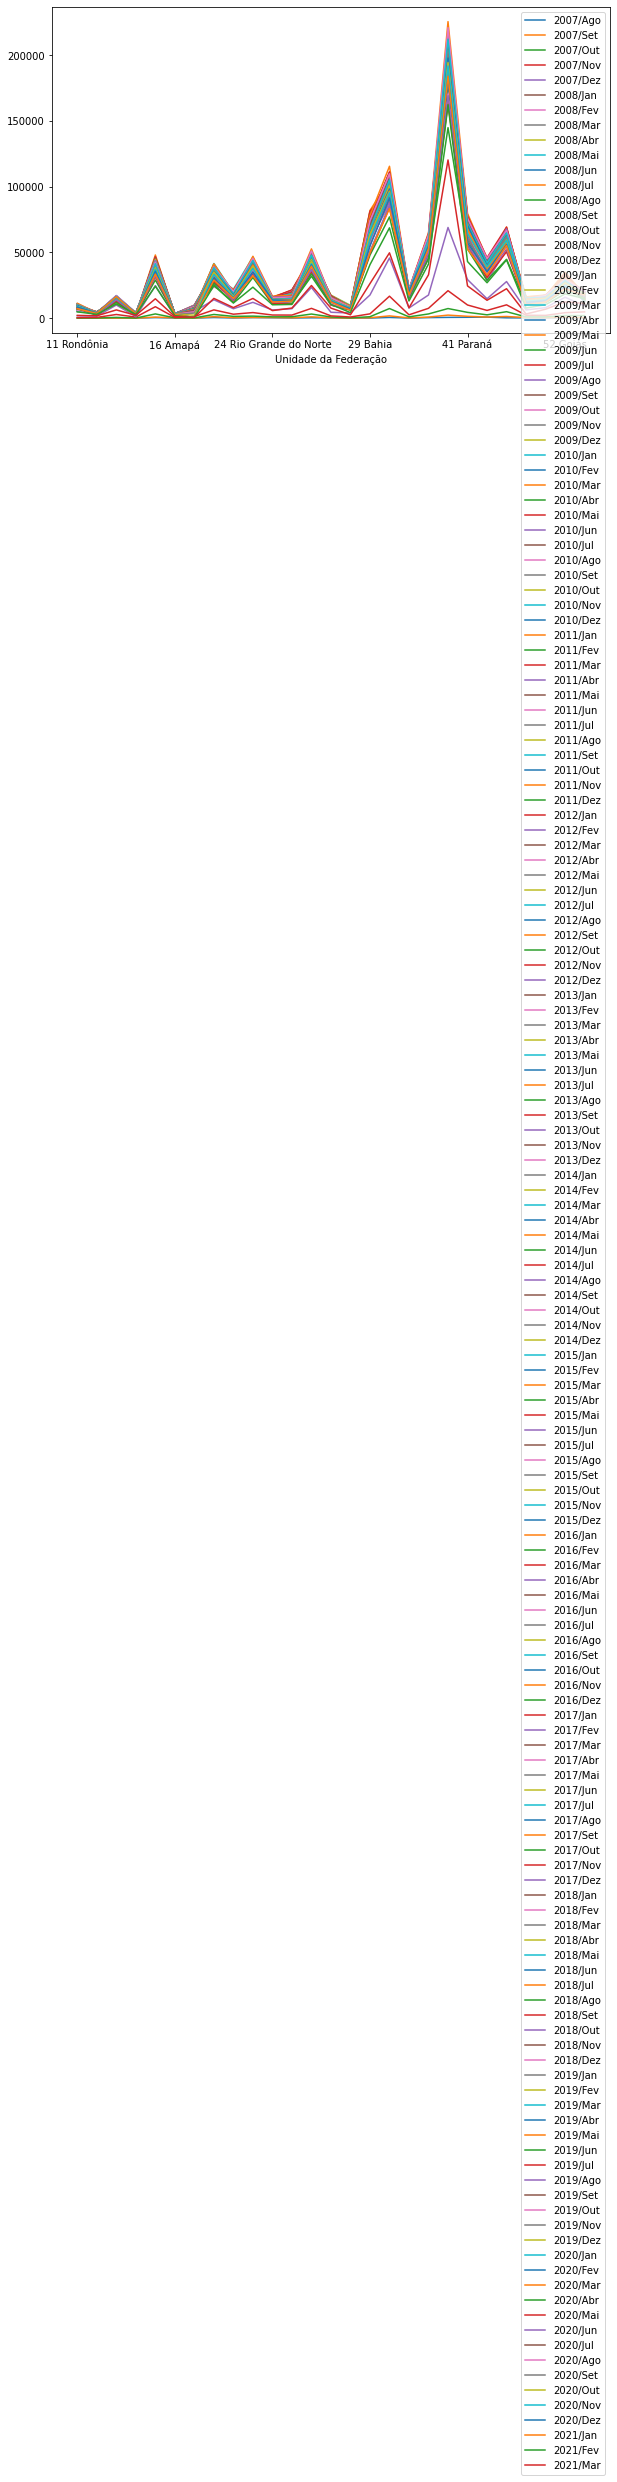

In [24]:
internacao.plot(figsize=(10,6))
plt.show()

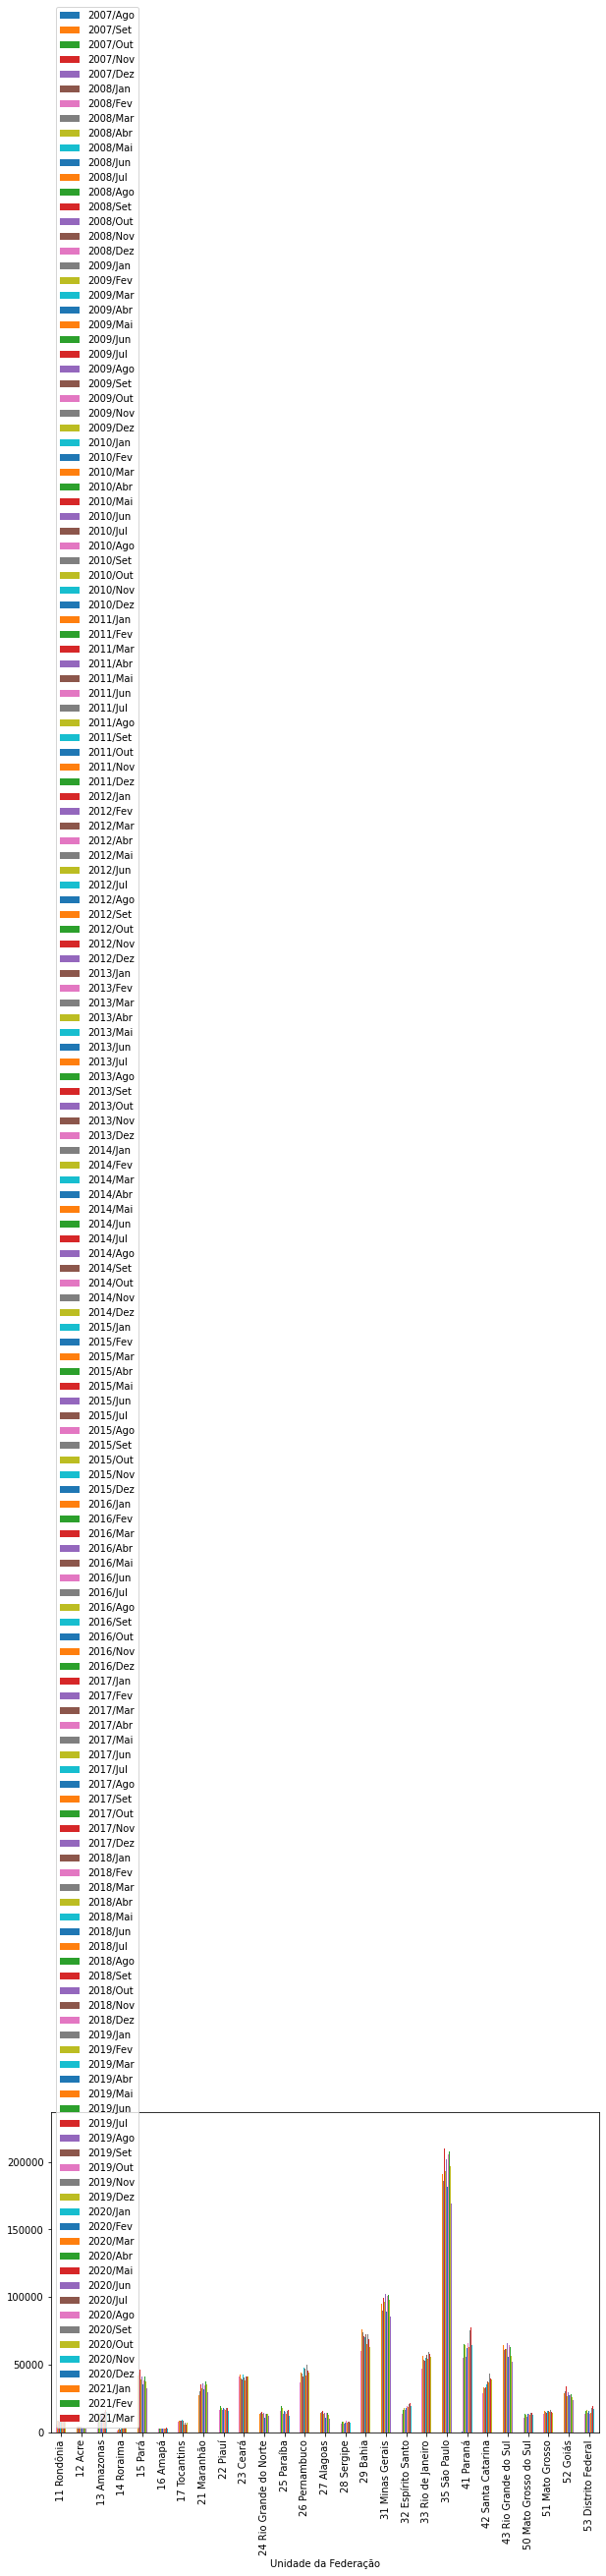

In [25]:
internacao.plot(kind = "bar", figsize=(10,6))
plt.show()